# Analisis Data dan yang akan dilakukan
*  Exploratory Data Analysis
*  K-Means Clustering
*  Elbow Method Plot
*  PCA Dimensionality Reduction
*  TSNE Dimensionality Reduction
*  K-Nearest Neighbour (KNN)
*  Naive Bayes
*  SVM
*  Classification Report di setiap model classification
> By Muhammad Irfani 20104037

In [2]:
# Import Python Libraries

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
%matplotlib inline

In [3]:
# Reading Dataset
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.isna().sum()
# Melakukan checking apakah ada data yang kosong

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Exploring ,Transforming and Visulaizing Dataset

In [6]:
df.shape

(200, 5)

In [7]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


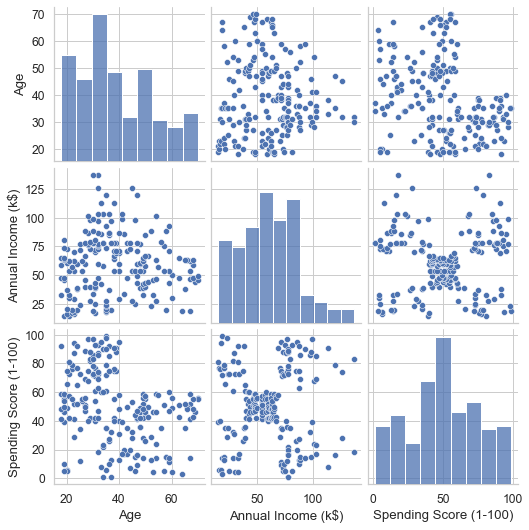

In [8]:
%matplotlib inline
import seaborn as sns

sns.set(font_scale=1.1)
sns.set_style('whitegrid')

grid = sns.pairplot(data=df, vars=df.columns[2:5])

Setelah Exploring PairPlot terlihat ada beberapa cluster yang terbentuk saat kita scatter plotting 'Annual Income (k$)' dengan 'Spending Score (1-100)'.

Terlihat sekitar 5 Cluster hadir.

In [9]:
# Tidak ada nilai null dalam dataset sehingga tidak perlu dibersihkan.
# Melakukan transform nilai gender dengan library LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
gender_mapping = {index: label for index, label in enumerate(encoder.classes_)}
gender_mapping
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Scaling Dataset

In [10]:
scaler = StandardScaler()
dataset_Scaled = scaler.fit_transform(df)

# Fit data ke KMeans

In [11]:
km = KMeans(n_clusters=5, random_state=10)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [12]:
df['cluster']= y_predicted
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,0
2,3,0,20,16,6,3
3,4,0,23,16,77,0
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,4
197,198,1,32,126,74,2
198,199,1,32,137,18,4


Sekarang kita mempunyai data yang sudah berlabel

In [13]:
# Centroid Coordinate untuk cluster

km.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

Text(0, 0.5, 'Annual Income (k$)')

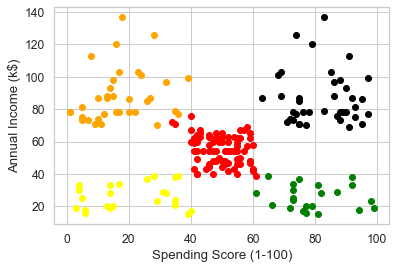

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'],color='green')
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'],color='red')
plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'],color='black')
plt.scatter(df4['Spending Score (1-100)'],df4['Annual Income (k$)'],color='yellow')
plt.scatter(df5['Spending Score (1-100)'],df5['Annual Income (k$)'],color='orange')

plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')


### Menghitung elbow - Untuk Eksperimen Lebih Lanjut dengan data

In [15]:
sse = []
k_rng = range(1,20)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Spending Score (1-100)','Annual Income (k$)']])
    sse.append(km.inertia_)

C:\Users\muham\anaconda3\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


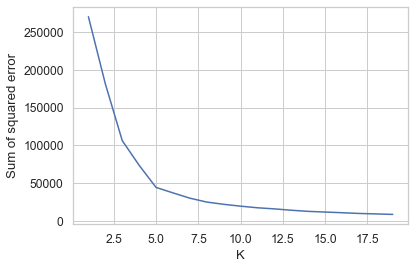

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Menurut Aturan Elbow Untuk K Clustering jumlah cluster optimal adalah 5 dan kita telah mengambil itu saja.

## Dimensionality reduction with Principal Component Analysis (PCA)
* Untuk melakukan compress pada data

In [17]:
from sklearn.decomposition import PCA

# Reduce to two components

reduced_data_pca = PCA(n_components=2, random_state=10).fit_transform(dataset_Scaled)

In [18]:
reduced_data_pca.shape

(200, 2)

In [19]:
reduced_data_pca[1:5]

array([[-2.27239142, -1.47410364],
       [-2.45422326, -0.00692224],
       [-2.38646142, -1.74993499],
       [-2.39737671, -0.36934116]])

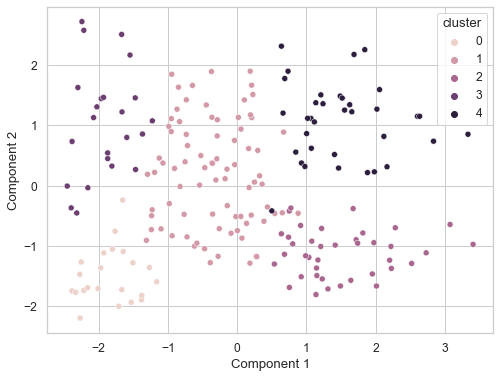

In [20]:
# Visulaising Reduced Data

reduced_df = pd.DataFrame(reduced_data_pca,columns=['Component 1', 'Component 2'])
reduced_df['cluster'] = df.cluster
plt.figure(figsize=(8,6))
axes = sns.scatterplot(data=reduced_df, hue='cluster', legend='brief', 
                       x='Component 1', y='Component 2')

Cluster atau tidak terdefinisi dengan baik dan bergabung satu sama lain

## Dimensionality reduction dengan TSNE

In [21]:
from sklearn.manifold import TSNE

# Reduce to two components 

reduced_data_tsne = TSNE(n_components=2, random_state=10).fit_transform(dataset_Scaled)

In [22]:
reduced_data_tsne.shape

(200, 2)

In [23]:
reduced_data_tsne[1:5]

array([[-0.7130662, -8.963463 ],
       [ 7.4048786, -2.27293  ],
       [ 3.8537545, -5.121514 ],
       [ 6.051687 , -2.1080344]], dtype=float32)

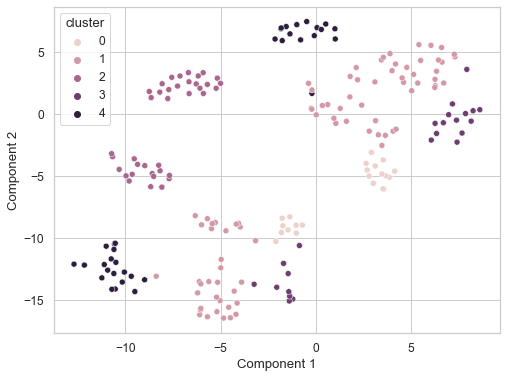

In [24]:
# Visulaising Reduced Data

reduced_df = pd.DataFrame(reduced_data_tsne,columns=['Component 1', 'Component 2'])
reduced_df['cluster'] = df.cluster
plt.figure(figsize=(8,6))
axes = sns.scatterplot(data=reduced_df, hue='cluster', legend='brief', 
                       x='Component 1', y='Component 2')

In [25]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df, km.labels_, metric ="euclidean")
print("Silloutter Score: %.3f" % score)
print("inertia  :", km.inertia_)

Silloutter Score: 0.163
inertia  : 8781.345063270062


In [26]:
df.to_csv("clustered.csv")

# Supervised Learning K-NN, Naive Bayes, SVM

## K-NN 

In [55]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,0
2,3,0,20,16,6,3
3,4,0,23,16,77,0
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,4
197,198,1,32,126,74,2
198,199,1,32,137,18,4


In [28]:
df.shape

(200, 6)

In [29]:
# Target Column adalah 'cluster'
# Disini, x adalah independent variable and y adalah dependent variable

x = df.drop(['cluster'], axis=1).values
y = df['cluster'].values

In [30]:
#Shape dari Sample and Target Set

print(f'Shape of Sample Set = {x.shape}')
print(f'Shape of Target Set = {y.shape}')

Shape of Sample Set = (200, 5)
Shape of Target Set = (200,)


###  Split the data untuk training and testing

In [31]:
# Split the data for training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(x,y,test_size=0.3, random_state=10)


### Explore the data and target values

In [32]:
# Shapes of the training and testing data

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')

print()
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (140, 5)
X_test.shape  = (60, 5)

y_train.shape = (140,)
y_test.shape  = (60,)


### Create and train the k-nearest neighbors model

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [34]:
# Test the model by predicting cluster

predicted = knn.predict(X=X_test)
expected = y_test

print('First twenty predictions:')
print(f'predicted[:20] = {predicted[:20]}')
print(f' expected[:20] = {expected[:20]}')

First twenty predictions:
predicted[:20] = [1 0 3 4 1 0 4 1 1 3 1 3 1 4 1 1 1 1 1 2]
 expected[:20] = [1 0 3 4 1 0 4 1 1 3 1 3 1 1 4 1 1 1 1 2]


In [35]:
wrong = [ (pred, exp) 
          for (pred, exp) in zip(predicted, expected) 
          if pred != exp
        ]

print('Wrong predictions:')
print(wrong)

Wrong predictions:
[(4, 1), (1, 4), (0, 1)]


In [36]:
# Model prediction accuracy

print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 95.00%


### Classification Report

In [37]:
from sklearn.metrics import classification_report

names = [0,1,2,3,4]
print(classification_report(expected, predicted, names))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.97      0.93      0.95        30
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       0.91      0.91      0.91        11

    accuracy                           0.95        60
   macro avg       0.95      0.97      0.96        60
weighted avg       0.95      0.95      0.95        60



C:\Users\muham\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0, 1, 2, 3, 4] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


## Naive Bayes

In [38]:
df.shape

(200, 6)

In [39]:
x = df.drop(["cluster"], axis=1).values
y = df["cluster"].values

In [40]:
#Shape dari Sample and Target Set

print(f'Shape of Sample Set = {x.shape}')
print(f'Shape of Target Set = {y.shape}')

Shape of Sample Set = (200, 5)
Shape of Target Set = (200,)


In [41]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')

print()
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (140, 5)
X_test.shape  = (60, 5)

y_train.shape = (140,)
y_test.shape  = (60,)


In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [43]:
gnb.fit(X_train, y_train)

GaussianNB()

In [44]:
predicted = gnb.predict(X=X_test)
expected = y_test

print('First twenty predictions:')
print(f'predicted[:20] = {predicted[:20]}')
print(f' expected[:20] = {expected[:20]}')

First twenty predictions:
predicted[:20] = [1 0 3 4 1 0 4 1 1 3 1 3 1 4 4 1 1 1 1 2]
 expected[:20] = [1 0 3 4 1 0 4 1 1 3 1 3 1 1 4 1 1 1 1 2]


In [45]:
wrong = [ (pred, exp) 
          for (pred, exp) in zip(predicted, expected) 
          if pred != exp
        ]

print('Wrong predictions:')
print(wrong)

Wrong predictions:
[(4, 1), (0, 1)]


In [46]:
# Model prediction 
print(f"Prediction Accuracy Score = {gnb.score(X_test, y_test):.2%}")

Prediction Accuracy Score = 96.67%


### Classification Report

In [47]:
from sklearn.metrics import classification_report

names = [0,1,2,3,4]
print(classification_report(expected, predicted, names))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.93      0.97        30
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       0.92      1.00      0.96        11

    accuracy                           0.97        60
   macro avg       0.96      0.99      0.97        60
weighted avg       0.97      0.97      0.97        60



C:\Users\muham\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0, 1, 2, 3, 4] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


## SVM

In [48]:
from sklearn import svm

In [49]:
df.shape

(200, 6)

In [50]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel='linear')
svcclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [51]:
y_pred = svcclassifier.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 7  0  0  0  0]
 [ 1 29  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  5  0]
 [ 0  1  0  0 10]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.97      0.97      0.97        30
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       1.00      0.91      0.95        11

    accuracy                           0.97        60
   macro avg       0.97      0.98      0.97        60
weighted avg       0.97      0.97      0.97        60

